In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [3]:
#### Asisting configuration
sys.path.append("..")

In [4]:
sys.version

'3.7.4 (default, Sep 22 2020, 11:44:10) \n[Clang 11.0.3 (clang-1103.0.32.62)]'

In [96]:
pd.set_option('display.max_rows', 200)

In [6]:
df = pd.read_csv("../data/ds_challenge_apr2021.csv")

In [36]:
df = df.rename(columns={'ID_USER':'id_user'})
df['fecha'] = pd.to_datetime(df['fecha'])

In [37]:
df

,id_user,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
0,0,F,608.345634,2020-01-21,20,"{'model': 2020, 'device_score': 3, 'os': 'ANDR...",Super,Merida,Física,71000,51,Aceptada,False,60.834563,5.475111,False
1,0,F,88.719243,2020-01-15,7,"{'model': 2020, 'device_score': 1, 'os': 'ANDR...",NaN,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False
2,1,F,790.037653,2020-01-17,11,"{'model': 2020, 'device_score': 1, 'os': '.'}",NaN,Guadalajara,Virtual,94000,56,En proceso,False,0.000000,15.800753,False
3,1,F,767.005387,2020-01-05,11,"{'model': 2020, 'device_score': 3, 'os': 'WEB'}",MPago,Guadalajara,Física,94000,56,Aceptada,False,0.000000,7.670054,False
4,1,F,254.171053,2020-01-30,10,"{'model': 2020, 'device_score': 3, 'os': '%%'}",NaN,Guadalajara,Física,94000,56,Aceptada,False,0.000000,2.541711,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26970,3999,M,746.192089,2020-01-08,13,"{'model': 2020, 'device_score': 2, 'os': 'ANDR...",NaN,Toluca,Física,40000,56,Aceptada,False,0.000000,7.461921,False
26971,3999,M,941.804966,2020-01-14,15,"{'model': 2020, 'device_score': 2, 'os': 'WEB'}",NaN,Toluca,Física,40000,56,Aceptada,False,0.000000,9.418050,False
26972,3999,M,251.189885,2020-01-16,11,"{'model': 2020, 'device_score': 2, 'os': 'WEB'}",NaN,Toluca,Virtual,40000,56,Aceptada,False,0.000000,5.023798,False
26973,3999,M,24.182665,2020-01-13,17,"{'model': 2020, 'device_score': 5, 'os': '.'}",NaN,Toluca,Física,40000,56,Aceptada,False,2.418266,0.217644,False


/Users/ele/.pyenv/versions/dpa_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='hora'>

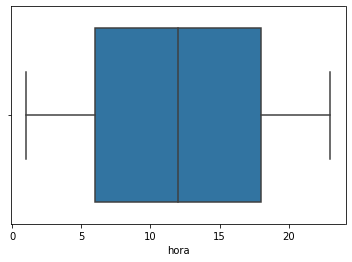

In [51]:
sns.boxplot(df['hora'])

<AxesSubplot:xlabel='hora', ylabel='Count'>

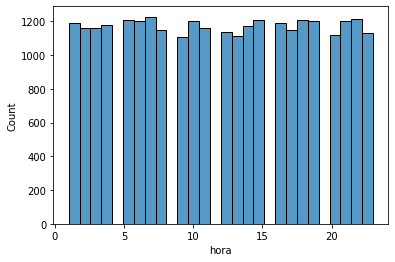

In [50]:
sns.histplot(df['hora'])

<AxesSubplot:ylabel='Count'>

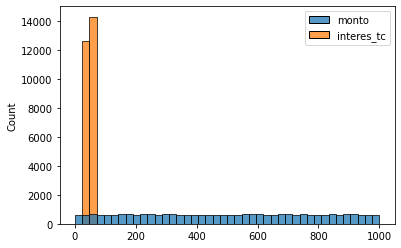

In [59]:
sns.histplot(df[(['monto','interes_tc'])])

<AxesSubplot:xlabel='dcto', ylabel='Count'>

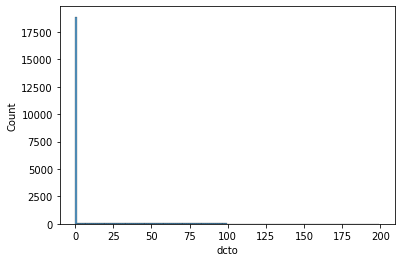

In [54]:
sns.histplot(df['dcto'])

<AxesSubplot:xlabel='cashback', ylabel='Count'>

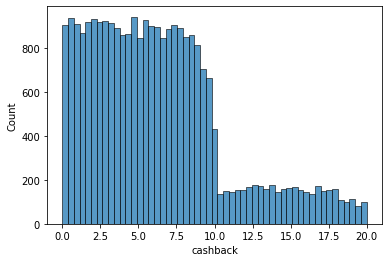

In [55]:
sns.histplot(df['cashback'])

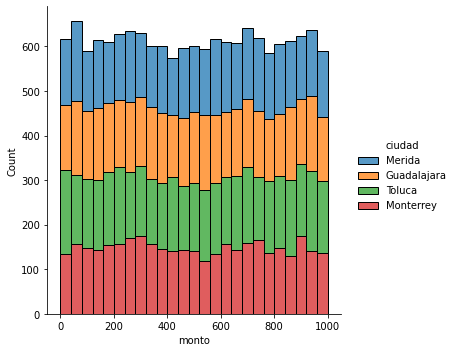

In [73]:
sns.displot(df,x='monto',hue='ciudad',multiple='stack')

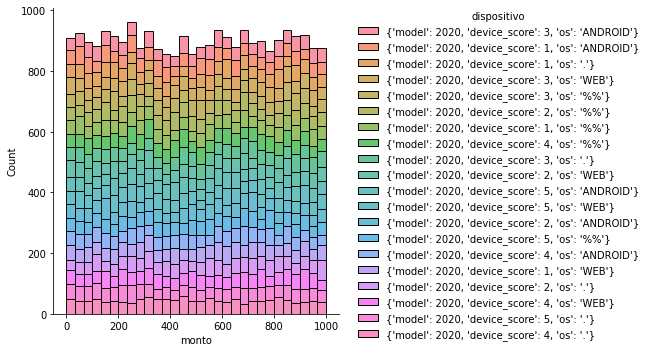

In [72]:
sns.displot(df,x='monto',hue='dispositivo',multiple='stack')

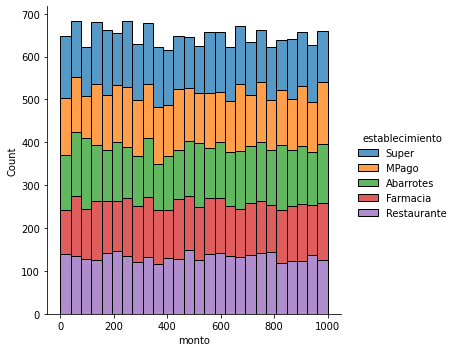

In [71]:
sns.displot(df,x='monto',hue='establecimiento',multiple='stack')

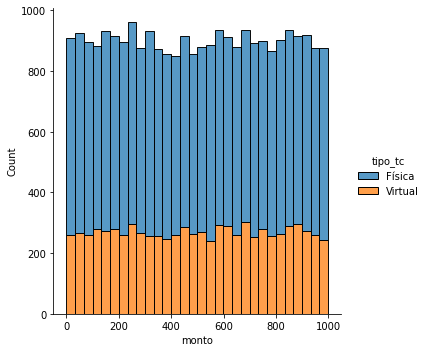

In [70]:
sns.displot(df,x='monto',hue='tipo_tc',multiple='stack')

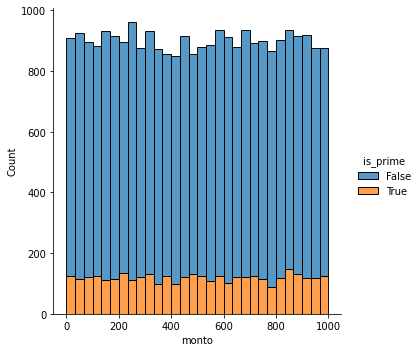

In [69]:
sns.displot(df,x='monto',hue='is_prime',multiple='stack')

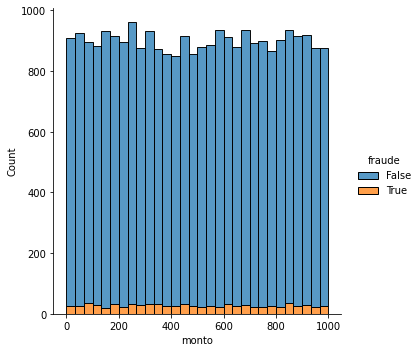

In [68]:
sns.displot(df,x='monto',hue='fraude',multiple='stack')

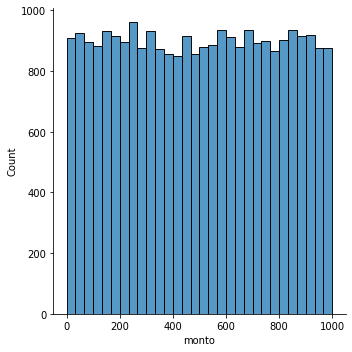

In [67]:
sns.displot(df,x='monto')

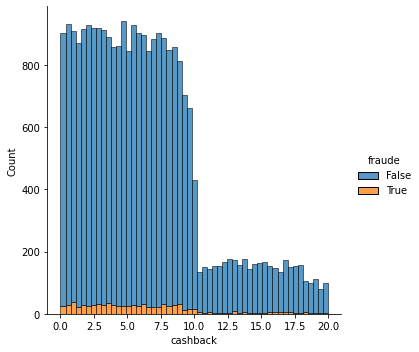

In [75]:
sns.displot(df,x='cashback',hue='fraude',multiple='stack')

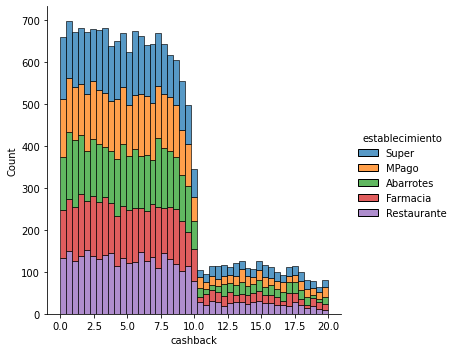

In [76]:
sns.displot(df,x='cashback',hue='establecimiento',multiple='stack')

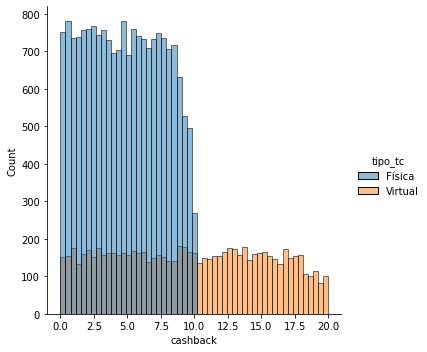

In [78]:
sns.displot(df,x='cashback',hue='tipo_tc')

<AxesSubplot:xlabel='fraude', ylabel='count'>

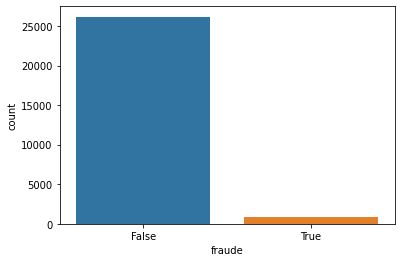

In [91]:
sns.countplot(data=df,x='fraude')

In [138]:
hola=df['id_user'].value_counts()

In [141]:
hola=pd.DataFrame(hola)

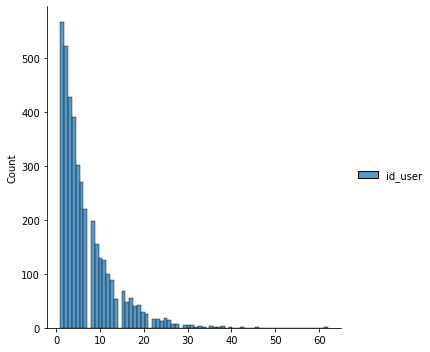

In [143]:
sns.displot(hola)

In [147]:
df[df['id_user']==1958]

,id_user,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
13141,1958,M,379.756046,2020-01-02,11,"{'model': 2020, 'device_score': 4, 'os': 'ANDR...",Abarrotes,NaN,Física,33000,63,Aceptada,False,37.975605,3.417804,False
13142,1958,M,808.420377,2020-01-21,20,"{'model': 2020, 'device_score': 2, 'os': '.'}",Restaurante,NaN,Virtual,33000,63,Aceptada,False,80.842038,14.551567,False
13143,1958,M,902.042267,2020-01-08,21,"{'model': 2020, 'device_score': 3, 'os': '%%'}",NaN,NaN,Física,33000,63,Aceptada,False,0.000000,9.020423,False
13144,1958,M,43.546293,2020-01-05,1,"{'model': 2020, 'device_score': 4, 'os': 'WEB'}",Super,NaN,Física,33000,63,En proceso,False,0.000000,0.435463,False
13145,1958,M,66.095718,2020-01-05,4,"{'model': 2020, 'device_score': 5, 'os': 'WEB'}",MPago,NaN,Física,33000,63,Rechazada,False,0.000000,0.660957,False
13146,1958,M,419.469445,2020-01-10,20,"{'model': 2020, 'device_score': 2, 'os': '.'}",Abarrotes,NaN,Física,33000,63,Aceptada,False,83.893889,3.355756,False
13147,1958,M,509.847800,2020-01-09,13,"{'model': 2020, 'device_score': 2, 'os': 'WEB'}",NaN,NaN,Física,33000,63,Aceptada,False,50.984780,4.588630,False
13148,1958,M,895.286932,2020-01-12,14,"{'model': 2020, 'device_score': 3, 'os': '.'}",Super,NaN,Virtual,33000,63,Aceptada,False,0.000000,17.905739,False
13149,1958,M,300.480050,2020-01-06,3,"{'model': 2020, 'device_score': 1, 'os': 'WEB'}",MPago,NaN,Virtual,33000,63,Aceptada,False,30.048005,5.408641,False
13150,1958,M,518.351848,2020-01-24,20,"{'model': 2020, 'device_score': 2, 'os': '%%'}",Restaurante,NaN,Virtual,33000,63,Rechazada,False,51.835185,9.330333,False


In [145]:
#df['id_user'].value_counts().plot(kind='bar')

In [146]:
#sns.countplot(x='id_user',data=df)

<AxesSubplot:xlabel='ciudad', ylabel='count'>

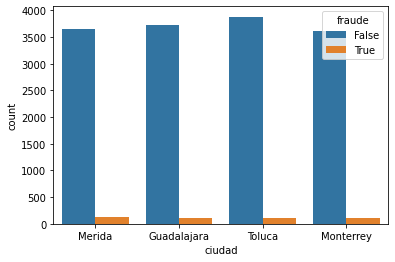

In [106]:
sns.countplot(x='ciudad',hue='fraude',data=df)

<AxesSubplot:xlabel='ciudad', ylabel='count'>

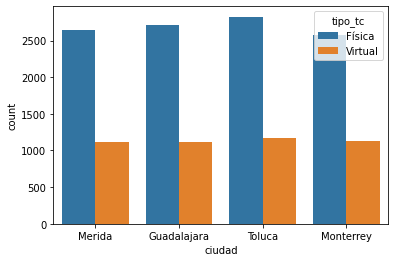

In [107]:
sns.countplot(x='ciudad',hue='tipo_tc',data=df)

<AxesSubplot:xlabel='tipo_tc', ylabel='count'>

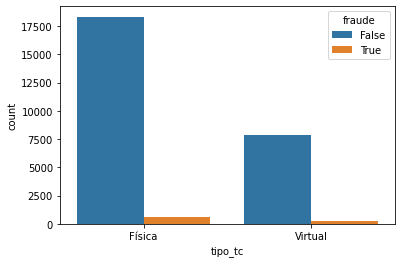

In [111]:
sns.countplot(x='tipo_tc',hue='fraude',data=df) ###########################

<AxesSubplot:xlabel='establecimiento', ylabel='count'>

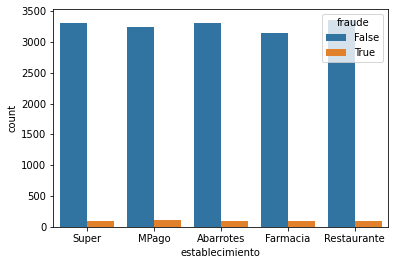

In [110]:
sns.countplot(x='establecimiento',hue='fraude',data=df)

<AxesSubplot:xlabel='fraude', ylabel='count'>

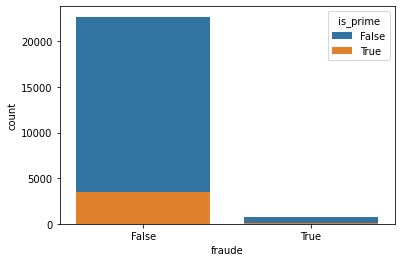

In [121]:
sns.countplot(x='fraude',hue='is_prime',data=df,dodge=False)

<AxesSubplot:xlabel='fraude', ylabel='count'>

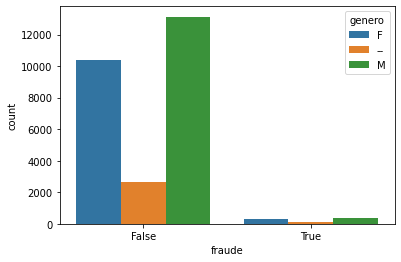

In [123]:
sns.countplot(x='fraude',hue='genero',data=df)